הקישור לשיתוף:  
https://drive.google.com/file/d/1skeGPanoAI7ZPOf7x_YSvWwMM-Ye2mye/view?usp=drive_link

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [ ]:
# הורדת קובץ ה-ZIP מגוגל דרייב
zip_id = "1skeGPanoAI7ZPOf7x_YSvWwMM-Ye2mye"
!gdown --id {zip_id} -O dataset.zip

# חילוץ הקבצים
!unzip dataset.zip -d dataset
print("הללויה הקבצים כאן")

In [3]:
# נתיבי התיקיות
train_path = "dataset/train"
test_path = "dataset/test"

In [4]:
# טעינת התמונות ישירות מהתיקיות
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(150, 150),
    batch_size=32
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(150, 150),
    batch_size=32
)

Found 1502 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [14]:
class_names = train_dataset.class_names #תרא איזה קסם- הוא קרא את זה משמות התיקיות
class_names

['nachos', 'waffles']

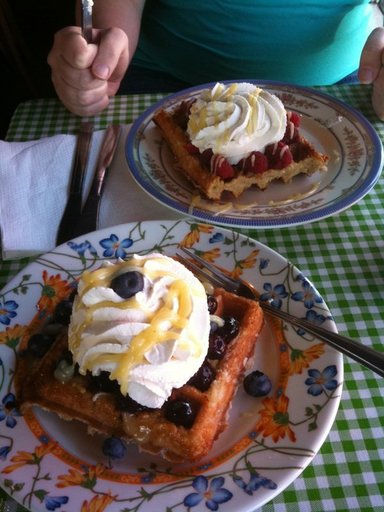

In [13]:
tf.keras.preprocessing.image.load_img('dataset/train/waffles/100242.jpg')


In [15]:
tf.keras.preprocessing.image.load_img('dataset/train/waffles/100242.jpg').size

(384, 512)

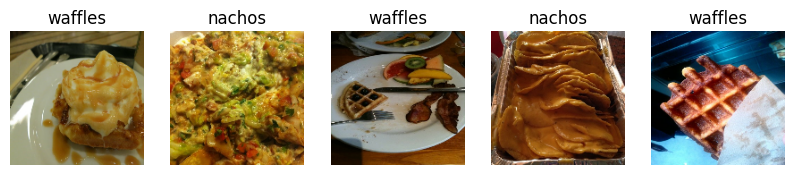

In [16]:
#בואו נראה שהוא טען את התמונות כמו שצריך
for images, labels in train_dataset.take(1):  # לקחת קבוצה אחת (רנדומלית) של תמונות
    plt.figure(figsize=(10, 5))
    for i in range(5):  # הצגת 5 תמונות
        ax = plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # הצגת תמונה בפורמט של תמונה
        plt.title(class_names[int(labels[i])])  # שם הקטגוריה
        plt.axis("off")  # ביטול הצירים
    plt.show()

In [21]:
# בנו מודל למיון התמונות
# חד פעמים שכבה ראשונה במודל צריכה להיות:
# tf.keras.layers.Rescaling(1./255),  # שכבת נורמליזציה
# בחרו פונקציית אקטיבציה בשכבת הפלט בתבונה
model = tf.keras.Sequential([
    #rescling
    tf.keras.layers.Rescaling(1./255),
    #cnn+maxpool 1
    tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #cnn+maxpool 2
    tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #flatten
    tf.keras.layers.Flatten(),
    #fc/dense
    tf.keras.layers.Dense(32, activation ='relu'),
    tf.keras.layers.Dropout(0.2),
    #outputlayer
    tf.keras.layers.Dense(1,activation ='sigmoid')
])

In [24]:
# קומפילציה של המודל
#בחרו פונקציית הפסד בתבונה
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss =tf.keras.losses.BinaryCrossentropy(),
              metrics =['accuracy'])

In [25]:
# אימון המודל
# השתמשו בנתוני המבחן עבור סט הולידציה
history = model.fit(train_dataset,
                    epochs =10,
                    validation_data = test_dataset)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - accuracy: 0.5488 - loss: 0.7893 - val_accuracy: 0.6720 - val_loss: 0.6397
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.6487 - loss: 0.6349 - val_accuracy: 0.7000 - val_loss: 0.5770
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6985 - loss: 0.5863 - val_accuracy: 0.6360 - val_loss: 0.6406
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7127 - loss: 0.5515 - val_accuracy: 0.6980 - val_loss: 0.5632
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.7770 - loss: 0.4696 - val_accuracy: 0.7340 - val_loss: 0.5418
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8215 - loss: 0.4001 - val_accuracy: 0.7580 - val_loss: 0.5744
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.8429 - loss: 0.3721 - val_accuracy: 0.7140 - val_loss: 0.6248
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9099 - loss: 0.2420 - val_accuracy: 0.6420 

אם נשאר זמן אפשר להוסיף גם את שני השלבים הבאים

In [26]:
# הערכת המודל
model.evaluate (test_dataset)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6879 - loss: 0.9451


[0.960534930229187, 0.6919999718666077]

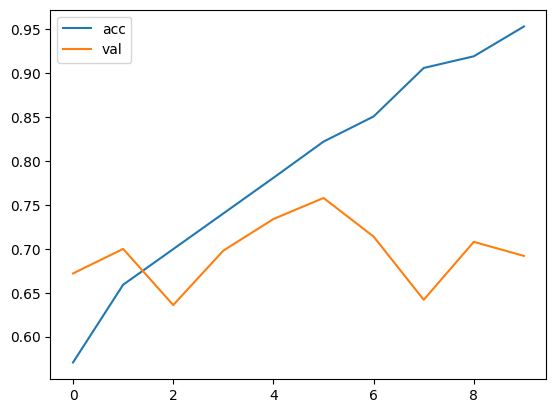

In [27]:
# הצגת גרף דיוק האימון
plt.plot(history.history['accuracy'],label ='acc')
plt.plot(history.history['val_accuracy'],label ='val')
plt.legend()
plt.show()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [ ]:
model2 =keras.models.Sequential([
  keras.layers.Conv2D(64, 7, activation="relu", padding="same"
                    input_shape=[512, 512, 3]),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(256 3, activation="relu", padding="same"),
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(64, activation="relu"),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1, activation="sigmoid")
])